In [19]:
import re
import math
from functools import partial

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('../archive/laptops.csv', encoding='latin-1')

#drop the useless columns

df = df.drop(columns='Unnamed: 0')


In [25]:
df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


/home/sayat/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

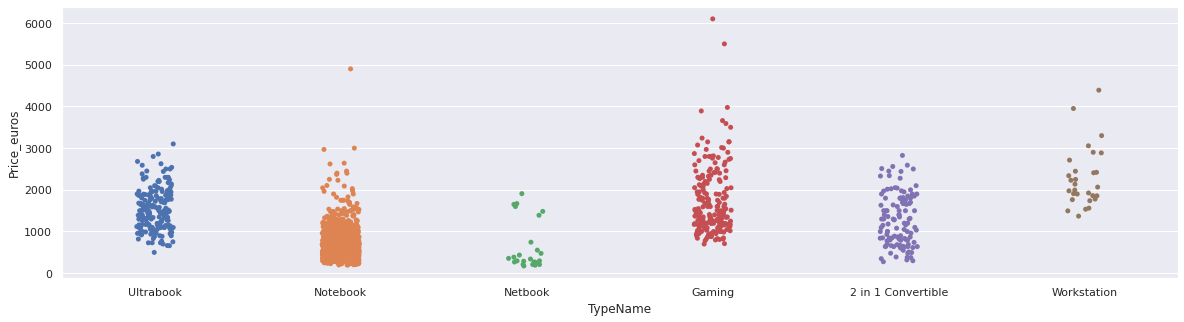

In [66]:
sns.stripplot(df['TypeName'], df['Price_euros'])

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

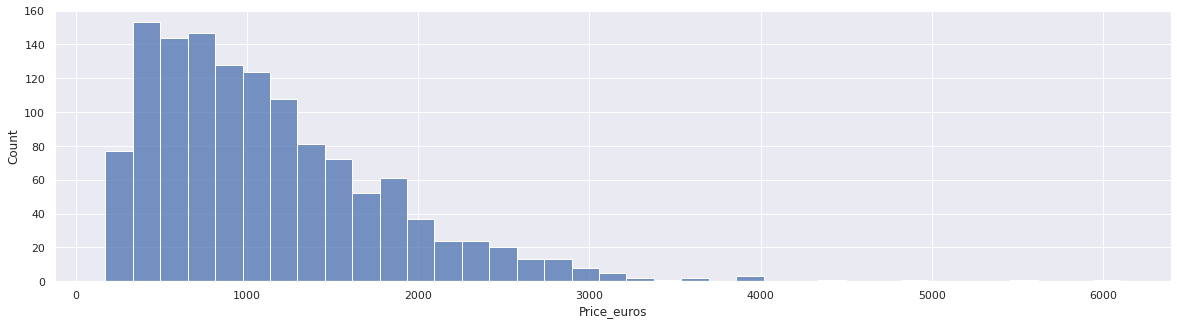

In [67]:
sns.histplot(df['Price_euros'])

In [68]:
def extract_product(product):
    product_list = product.split()
    product = product_list[0]
    if product_list[1].isalpha() or product_list[1][0].isalpha() :
        product += ' ' + product_list[1]
    return product

def extract_pure_resolution(screen_resolution):
    return re.search('[0-9]{3,4}x[0-9]{3,4}', screen_resolution).group()


In [69]:
df['Convertible'] = df['TypeName'] == '2 in 1 Convertible'
df['Product'] = df['Product'].apply(extract_product)
df['Retina Display'] = df['ScreenResolution'].str.contains('Retina Display')
df['Touchscreen'] = df['ScreenResolution'].str.contains("Touchscreen")
df['IPS Panel'] = df['ScreenResolution'].str.contains('IPS Panel')
df['Quad HD+'] = df['ScreenResolution'].str.contains('Quad HD+')
df['Ultra HD'] = df['ScreenResolution'].str.contains('Ultra HD')
df['ScreenResolution'] = df['ScreenResolution'].apply(extract_pure_resolution)

In [70]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Convertible',
       'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD'],
      dtype='object')

In [71]:
df['CPU brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu speed'] = df['Cpu'].apply(lambda x: float(re.search('([0-9]{1,2}\.[0-9]{1,3}GHz)|([0-9]GHz)', x)[0].replace('GHz', '')))
df['free OpSys'] = df['OpSys'].apply(lambda x: x in ('Linux', 'Android', 'No OS'))
df['GPU_provider'] = df['Gpu'].apply(lambda x: x.split()[0])

In [72]:
df['Ram'] = df['Ram'].apply(lambda x: int(x.replace('GB', '')))
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace('kg', '')))

In [73]:
cpu_types = {'Core M': 'Intel Core M',
 'Atom': 'Intel Atom',
 'Celeron': 'Intel Celeron',
 'Pentium': 'Intel Pentium',
 'i3': 'Intel i3',
 'i5': 'Intel i5',
 'i7': 'Intel i7',
 'Xeon': 'Intel Xeon',
 'AMD E-Series': 'AMD E',
 'AMD FX': 'AMD FX',
 'AMD A4': 'AMD A4',
 'AMD A6': 'AMD A6',
 'AMD A8': 'AMD A8',
 'AMD A9': 'AMD A9',
 'AMD A10': 'AMD A10',
 'AMD A12': 'AMD A12',
 'AMD Ryzen': 'AMD Ryzen',
 'Samsung': 'Samsung'}


In [74]:
for name, value in cpu_types.items():
    df.loc[df['Cpu'].str.contains(name),'Cpu']=value


In [75]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Convertible',
       'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD',
       'CPU brand', 'Cpu speed', 'free OpSys', 'GPU_provider'],
      dtype='object')

In [76]:
df.drop(columns=['Gpu'], inplace=True)

In [77]:
optinal_features = ['Inches', 'ScreenResolution', 'Product']

In [78]:
memory_types = ('SSD', 'HDD', 'Flash Storage', 'Hybrid')

In [79]:
df['Memory'] = df['Memory'].apply(lambda x: x.replace('.0', ''))

def process_memory(memory, _type):
    gb_match = re.match('([0-9]{1,4})GB ' + _type, memory)
    if gb_match:
        return int(gb_match.groups()[0])
    
    tb_match = re.match('([0-9]{1,4})TB ' + _type, memory)

    if tb_match:
        return int(tb_match.groups()[0]) * 1000

    return 0


def process_combined_memory(_type, memory):
    split_memory = memory.split(' +  ')
    res = sum(process_memory(mem, _type) for mem in split_memory)
    return res

for memory_type in memory_types:
    df[memory_type] = df['Memory'].apply(partial(process_combined_memory, memory_type))


In [80]:

def resolution_to_number(resolution, diagonal):
    width, height = map(int, resolution.split('x'))
    return math.sqrt(width**2+height**2)/diagonal

In [81]:
df['Pixels Per Inch'] = df.apply(lambda x: resolution_to_number(x.ScreenResolution, x.Inches), axis=1)

In [82]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'OpSys', 'Weight', 'Price_euros', 'Convertible',
       'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD',
       'CPU brand', 'Cpu speed', 'free OpSys', 'GPU_provider', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'Pixels Per Inch'],
      dtype='object')

In [88]:
df[df['Cpu']=='Intel Xeon']

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,OpSys,Weight,...,Ultra HD,CPU brand,Cpu speed,free OpSys,GPU_provider,SSD,HDD,Flash Storage,Hybrid,Pixels Per Inch
204,Dell,Precision,Workstation,15.6,3840x2160,Intel Xeon,16,256GB SSD + 1TB HDD,Windows 10,2.80,...,True,Intel,3.0,False,Nvidia,256,1000,0,0,282.423996
447,Dell,Precision,Workstation,15.6,1920x1080,Intel Xeon,8,64GB Flash Storage + 1TB HDD,Windows 10,2.23,...,False,Intel,3.0,False,Nvidia,0,1000,64,0,141.211998
610,Lenovo,Thinkpad P51,Notebook,15.6,3840x2160,Intel Xeon,32,1TB SSD,Windows 10,2.50,...,True,Intel,3.1,False,Nvidia,1000,0,0,0,282.423996
749,HP,Zbook,Workstation,17.3,1920x1080,Intel Xeon,16,256GB SSD,Windows 7,3.00,...,False,Intel,2.9,False,Nvidia,256,0,0,0,127.335675


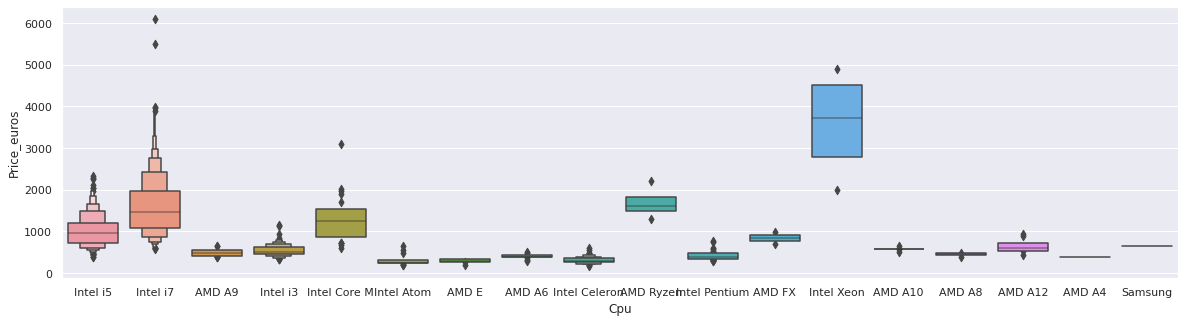

In [91]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,5)})

sns.boxenplot(x=df["Cpu"], y=df["Price_euros"])
y=df["Price_euros"]

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

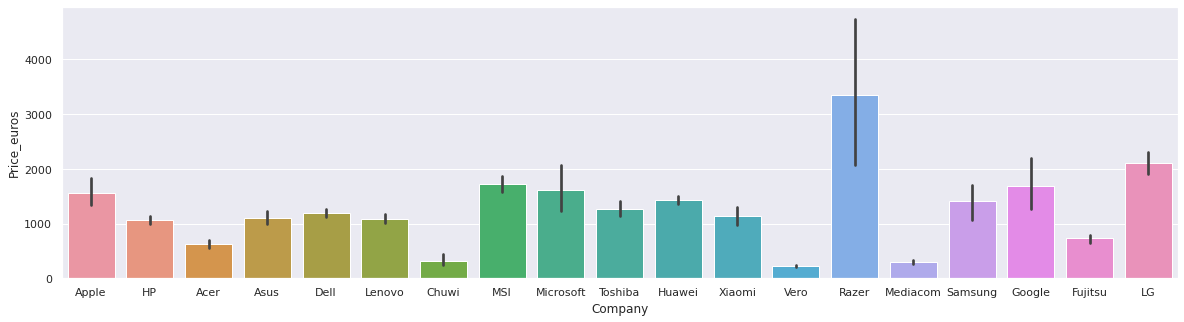

In [113]:
sns.barplot(x=df["Company"], y=y)

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

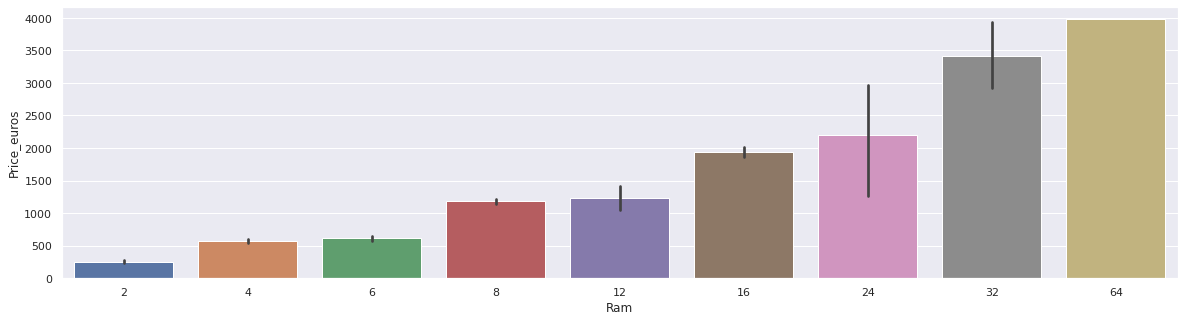

In [111]:
sns.barplot(x=df["Ram"], y=y)

In [99]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'OpSys', 'Weight', 'Price_euros', 'Convertible',
       'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD',
       'CPU brand', 'Cpu speed', 'free OpSys', 'GPU_provider', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'Pixels Per Inch'],
      dtype='object')

<AxesSubplot:xlabel='Retina Display', ylabel='Price_euros'>

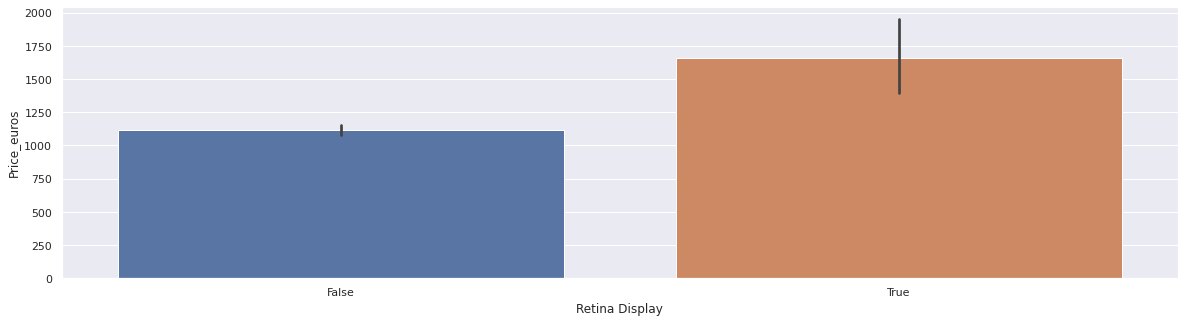

In [100]:
sns.barplot(x=df["Retina Display"], y=df["Price_euros"])

<AxesSubplot:xlabel='Cpu speed', ylabel='Price_euros'>

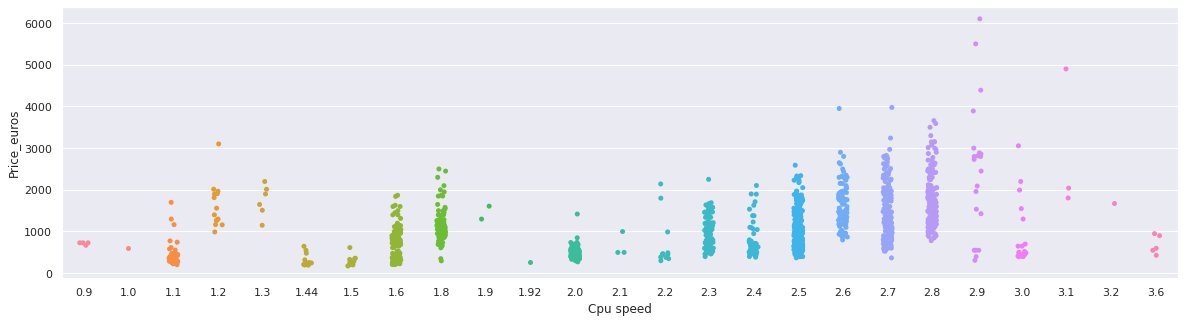

In [112]:
sns.stripplot(x=df["Cpu speed"], y=df["Price_euros"])

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

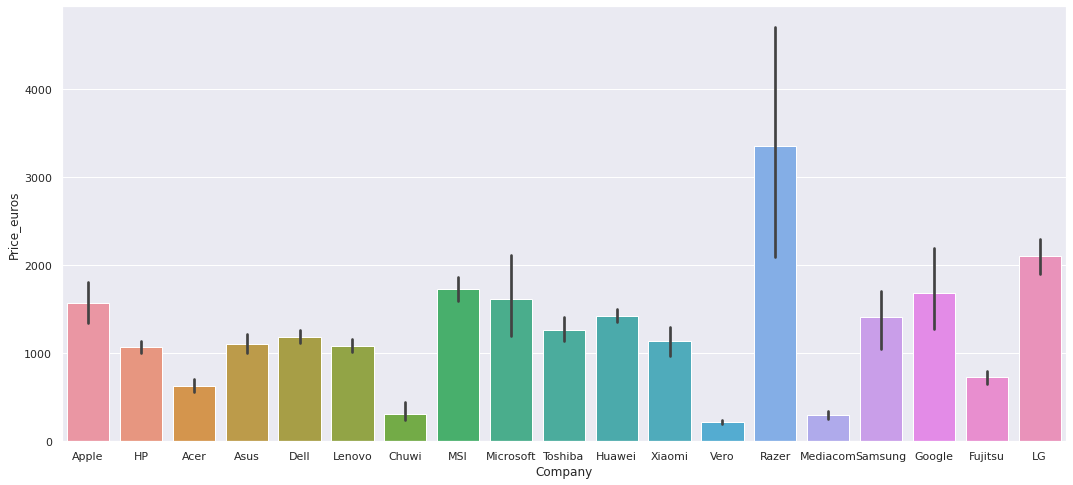

In [102]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.barplot(x=df["Company"], y=df["Price_euros"])

/home/sayat/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sayat/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sayat/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sayat/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

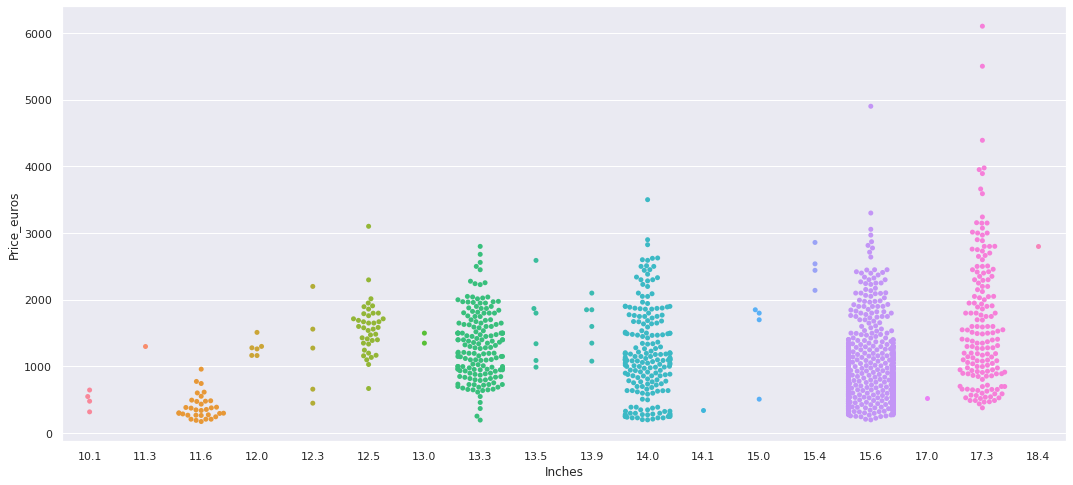

In [103]:
sns.swarmplot(x=df["Inches"], y=df["Price_euros"])

In [116]:
kf = df[df['GPU_provider']!='ARM']

<AxesSubplot:xlabel='Pixels Per Inch', ylabel='Price_euros'>

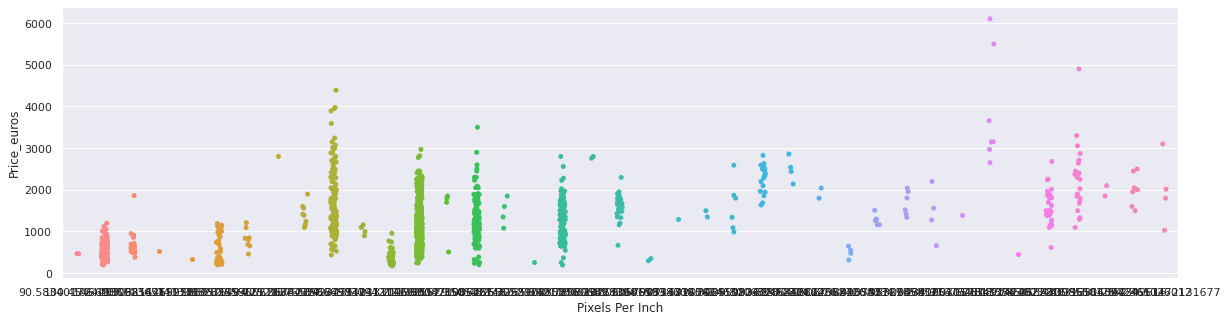

In [129]:
sns.stripplot(x=df["Pixels Per Inch"], y=df["Price_euros"])

<AxesSubplot:xlabel='free OpSys', ylabel='Price_euros'>

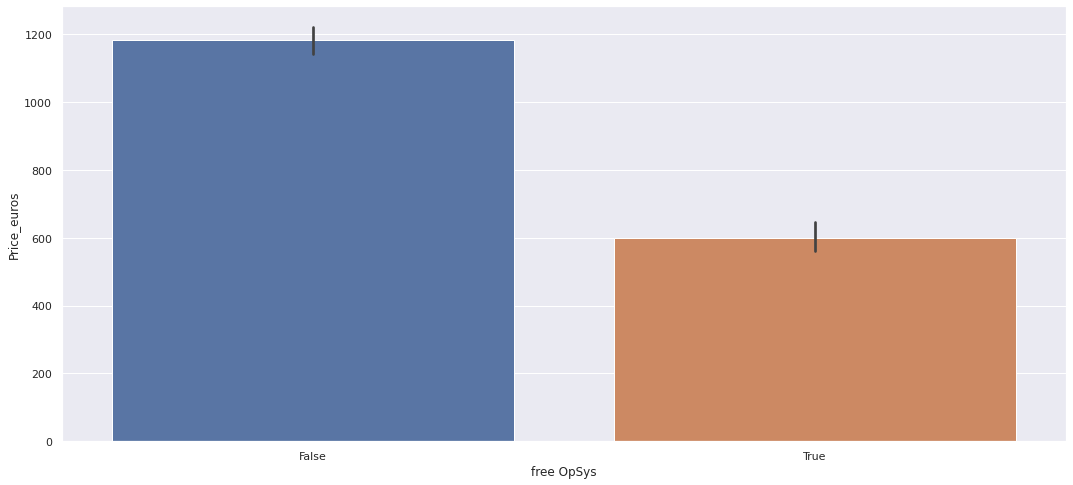

In [105]:
sns.barplot(x=df["free OpSys"], y=df["Price_euros"])

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

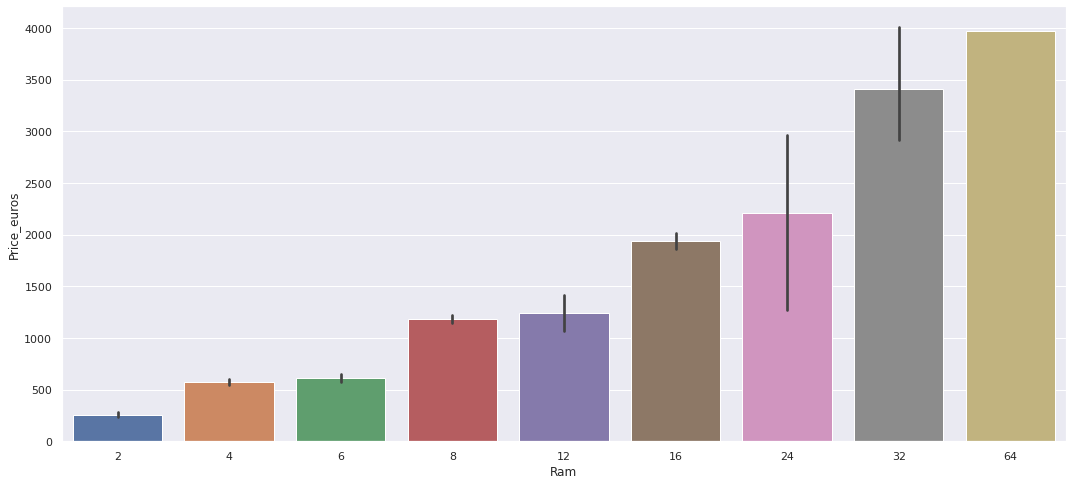

In [106]:
sns.barplot(x=df["Ram"], y=df["Price_euros"], order=sorted(df["Ram"].unique()))

<AxesSubplot:xlabel='ScreenResolution', ylabel='Price_euros'>

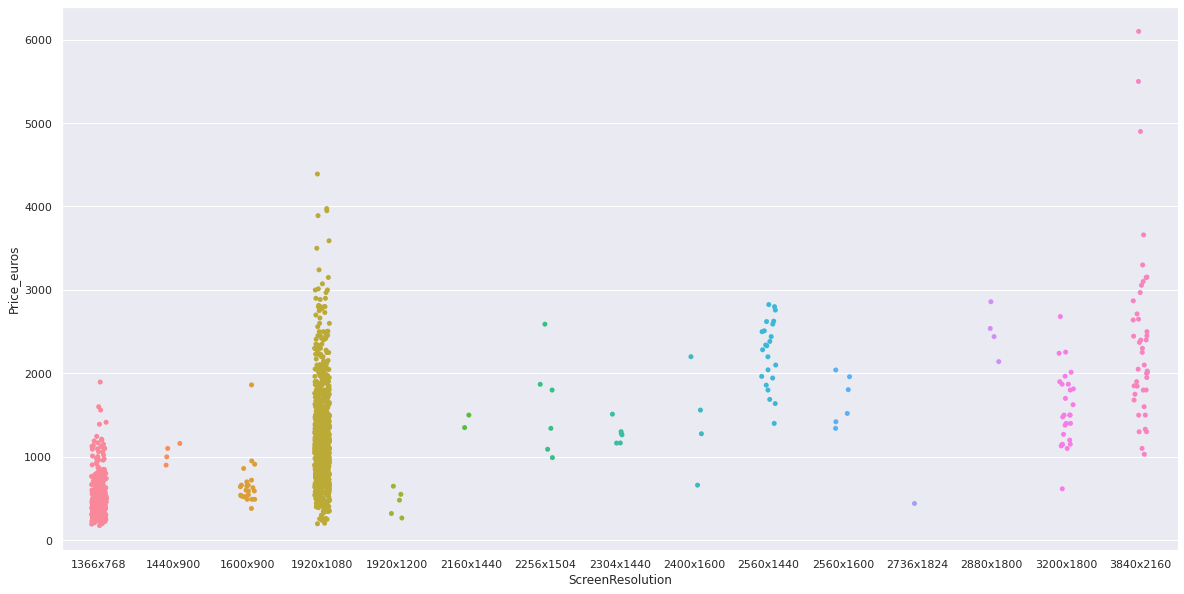

In [107]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.stripplot(x=df["ScreenResolution"], y=df["Price_euros"], order=sorted(df["ScreenResolution"].unique()))

<AxesSubplot:xlabel='Pixels Per Inch', ylabel='Price_euros'>

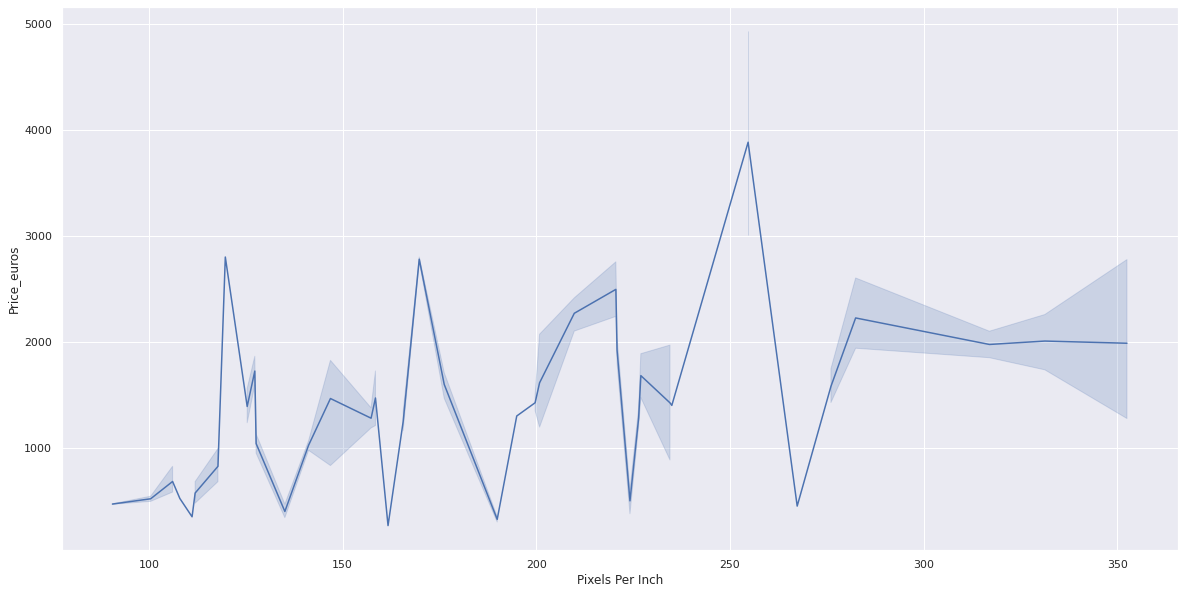

In [108]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.lineplot(x=df["Pixels Per Inch"], y=df["Price_euros"])#, order=sorted(df["Pixels Per Inch"].unique()))


In [109]:
df.drop(columns=['Memory'], inplace=True)

In [110]:
y = df['Price_euros']

In [111]:
boolean_features = ['Convertible', 'Retina Display', 'Touchscreen', 'IPS Panel', 'Quad HD+', 'Ultra HD', 'free OpSys']

for feature in boolean_features:
    df[feature] = df[feature].astype(int)

In [112]:
df['Ram'] = df['Ram'].astype(float)
df['Weight'] = df['Weight'].astype(float)

In [113]:
y = df['Price_euros']

In [114]:
df.drop(columns=['Price_euros'], inplace=True)

In [115]:
non_boolean_ordinal_features = ['ScreenResolution', 'CPU brand']

In [116]:
nominal_features = ['Company', 'TypeName', 'GPU_provider', 'Cpu', 'OpSys', 'Product']

In [117]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [118]:
column_transform = make_column_transformer(
    (OrdinalEncoder(), non_boolean_ordinal_features),
    (OneHotEncoder(), nominal_features),
    remainder='passthrough'
    
)


res = column_transform.fit_transform(df)

scaler = MaxAbsScaler()
tr = scaler.fit_transform(res)


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVC

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [121]:
for i in [500, 1000, 2000]:
    for j in [0, 5, 10, 15, 20]:
        model = GradientBoostingRegressor(n_estimators=i, random_state=j)
        score = cross_val_score(model, tr, y, cv=kf, scoring='neg_mean_absolute_error')
        print(score.mean(), model.__class__.__name__, i, j)

-168.91156157847988 GradientBoostingRegressor 500 0
-165.64611367453318 GradientBoostingRegressor 500 5
-166.35558313862367 GradientBoostingRegressor 500 10
-164.52929205408506 GradientBoostingRegressor 500 15
-160.99299557292812 GradientBoostingRegressor 500 20
-160.03666097514972 GradientBoostingRegressor 1000 0
-155.45611430494074 GradientBoostingRegressor 1000 5
-161.2115169752637 GradientBoostingRegressor 1000 10
-157.73927104755793 GradientBoostingRegressor 1000 15
-160.03000400155818 GradientBoostingRegressor 1000 20
-154.59958762606902 GradientBoostingRegressor 2000 0
-155.09195645001398 GradientBoostingRegressor 2000 5
-156.98599243747339 GradientBoostingRegressor 2000 10
-154.7745417768807 GradientBoostingRegressor 2000 15
-154.8224279560422 GradientBoostingRegressor 2000 20


In [ ]:
kf = KFold(shuffle=True, n_splits=5)

models = [RandomForestRegressor(i, random_state=10) for i in [5,10,20,50,100, 200,500]]
models.extend(XGBRegressor(n_estimators=i, random_state=10) for i in [5,10,20,50,100,200,500])
models.extend(GradientBoostingRegressor(n_estimators=i, random_state=j) for i in [5,10,20,50,100,200,500] for j in [5, 10, 15, 20])

    
models.extend([LinearRegression(), ExtraTreesRegressor(), LGBMRegressor() ])
for model in models:
    score = cross_val_score(model, tr, y, cv=kf, scoring='r2')
    print(score.mean(), model.__class__.__name__)

0.8320832993304951 RandomForestRegressor
0.8377505404330208 RandomForestRegressor
0.8274105512718153 RandomForestRegressor
0.8491996496350236 RandomForestRegressor


In [ ]:
kf = KFold(shuffle=True, n_splits=5)

models = [RandomForestRegressor(i, random_state=10) for i in [5,10,20,50,100, 200,500]]
models.extend(XGBRegressor(n_estimators=i,booster='dart') for i in [5,10,20,50,100,200,500])
models.extend(GradientBoostingRegressor(n_estimators=i, random_state=10) for i in [5,10,20,50,100,200,500])

    
models.extend([LinearRegression(), ExtraTreesRegressor(), LGBMRegressor() ])
for model in models:
    score = cross_val_score(model, tr, y, cv=kf, scoring='r2')
    print(score.mean(), model.__class__.__name__)